<a href="https://colab.research.google.com/github/iamrafinawaz/Data-Analytics/blob/main/Statistics_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. **Hypothesis testing:**  A formal procedure for deciding between two hypotheses about a population parameter.

2. **Null vs. Alternative hypothesis:**  The null hypothesis (H0) states no effect or no difference, while the alternative hypothesis (Ha) states an effect or difference.

3. **Significance level (alpha):** The probability of rejecting H0 when it is true (Type I error).  Commonly set at 0.05.

4. **P-value:** The probability of observing the data (or more extreme) if the null hypothesis is true.

5. **Interpreting p-value:**  A small p-value (typically < alpha) suggests strong evidence against H0.

6. **Type I & II errors:** Type I error: rejecting H0 when true (false positive). Type II error: failing to reject H0 when false (false negative).

7. **One-tailed vs. two-tailed tests:** One-tailed tests are directional (e.g., greater than), two-tailed tests are non-directional (e.g., different).

8. **Z-test:** Used to test hypotheses about a population mean when the population standard deviation is known and the sample size is large.

9. **Z-score:** Measures how many standard deviations a data point is from the mean. Calculated as (data point - mean) / standard deviation.

10. **T-distribution:**  Similar to the normal distribution but with heavier tails, used when the population standard deviation is unknown and sample size is small.

11. **Z-test vs. T-test:** Z-test assumes known population standard deviation, T-test does not.

12. **T-test:** Used to test hypotheses about a population mean when the population standard deviation is unknown.

13. **Relationship between Z & T:** As sample size increases, the t-distribution approaches the z-distribution.

14. **Confidence interval:**  An estimated range of values that is likely to include the population parameter.

15. **Margin of error:**  The range added and subtracted from the point estimate to create the confidence interval.

16. **Bayes' Theorem:**  Calculates conditional probabilities, used to update beliefs given evidence.

17. **Chi-square distribution:** Used to test categorical data.

18. **Chi-square goodness of fit test:**  Tests how well observed data fits a hypothesized distribution.

19. **F-distribution:** Used in ANOVA tests.

20. **ANOVA (Analysis of Variance):**  Tests for differences in means among three or more groups. Assumes normal distribution and equal variances.

21. **Types of ANOVA:**  One-way (one factor), two-way (two factors), etc.

22. **F-test:** Used in ANOVA to compare variances between groups. Relates to hypothesis testing by determining if the variance explained by the factors is significantly greater than random variation.


In [4]:
# 1.
import math
from scipy import stats
import numpy as np
from scipy import stats

# Sample data
sample = [10, 12, 9, 11, 14, 8, 10, 11, 13, 10]
# Population parameters
population_mean = 10.5
population_std = 2

# Sample mean and sample size
sample_mean = np.mean(sample)
sample_size = len(sample)

# Z-score calculation
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# P-value calculation
p_value = stats.norm.sf(abs(z_score)) * 2  # two-tailed test

# Interpretation
significance_level = 0.05  # 5% significance level
if p_value < significance_level:
    result = "Reject the null hypothesis."
else:
    result = "Fail to reject the null hypothesis."

# Output the results
print(f"Sample Mean: {sample_mean}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")
print(f"Interpretation: {result}")




Sample Mean: 10.8
Z-Score: 0.474341649025258
P-Value: 0.6352562959972475
Interpretation: Fail to reject the null hypothesis.


In [7]:
# 2
import numpy as np
from scipy import stats

# Simulate data
np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=100)

# Hypothesis test
population_mean = 45
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)
t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"Sample Mean: {sample_mean}")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")




Sample Mean: 50.59808015534484
T-Statistic: 5.526458527950655
P-Value: 2.651310422319142e-07


In [9]:
import numpy as np
from scipy import stats

sample_data = [105, 110, 115, 120, 125]
population_mean = 100
population_std = 10

sample_mean = np.mean(sample_data)
n = len(sample_data)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Sample Mean: {sample_mean}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")


Sample Mean: 115.0
Z-Score: 3.3541019662496843
P-Value: 0.0007962301575907826


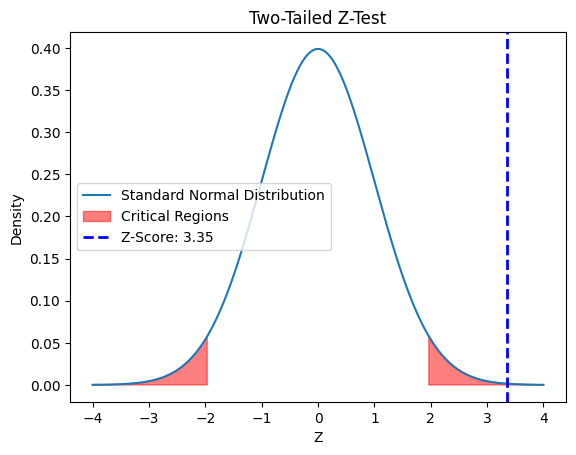

In [11]:
# 4.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

sample_data = [105, 110, 115, 120, 125]
population_mean = 100
population_std = 10

sample_mean = np.mean(sample_data)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(len(sample_data)))
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
plt.plot(x, y, label='Standard Normal Distribution')

plt.fill_between(x, 0, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.5, label='Critical Regions')
plt.axvline(z_score, color='blue', linestyle='dashed', linewidth=2, label=f'Z-Score: {z_score:.2f}')

plt.title('Two-Tailed Z-Test')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.show()


Z-Score: 2.7386127875258306
Type 1 Error (Alpha): 0.05
Type 2 Error (Beta): 1.3099035527461112e-06


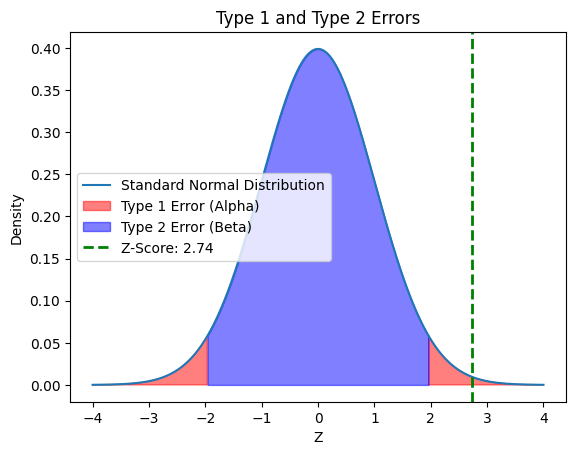

In [13]:
# 5
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def type_1_and_2_errors(sample_mean, population_mean, population_std, n, alpha):
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    z_critical = stats.norm.ppf(1 - alpha/2)
    type_1_error = alpha
    z_beta = stats.norm.ppf(alpha/2)
    type_2_error = stats.norm.cdf(z_beta - z_score)

    print(f"Z-Score: {z_score}")
    print(f"Type 1 Error (Alpha): {type_1_error}")
    print(f"Type 2 Error (Beta): {type_2_error}")

    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)
    plt.plot(x, y, label='Standard Normal Distribution')

    plt.fill_between(x, 0, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.5, label='Type 1 Error (Alpha)')
    plt.fill_between(x, 0, y, where=(x > -z_critical) & (x < z_critical), color='blue', alpha=0.5, label='Type 2 Error (Beta)')

    plt.axvline(z_score, color='green', linestyle='dashed', linewidth=2, label=f'Z-Score: {z_score:.2f}')

    plt.title('Type 1 and Type 2 Errors')
    plt.xlabel('Z')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

sample_mean = 105
population_mean = 100
population_std = 10
n = 30
alpha = 0.05

type_1_and_2_errors(sample_mean, population_mean, population_std, n, alpha)


In [15]:
# 6
import numpy as np
from scipy import stats

group1 = [88, 92, 85, 90, 86]
group2 = [91, 89, 94, 92, 87]

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: -1.3631084021929507
P-Value: 0.2099733658198221


In [16]:
# 7
import numpy as np
from scipy import stats

before = [105, 110, 115, 120, 125]
after = [107, 112, 118, 121, 127]

t_stat, p_value = stats.ttest_rel(before, after)

print(f"Paired T-Statistic: {t_stat}")
print(f"Paired P-Value: {p_value}")


Paired T-Statistic: -6.324555320336758
Paired P-Value: 0.0031982021523353082


In [17]:
# 8

import numpy as np
from scipy import stats

np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=30)

population_mean = 45
population_std = 10

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
z_p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
t_p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"Z-Test: Z-Score = {z_score}, P-Value = {z_p_value}")
print(f"T-Test: T-Statistic = {t_stat}, P-Value = {t_p_value}")



Z-Test: Z-Score = 5.164237446552205, P-Value = 2.4142107779567823e-07
T-Test: T-Statistic = 4.693360062287237, P-Value = 5.9444748344628096e-05


In [19]:
# 9
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - margin_of_error, mean + margin_of_error

sample_data = [105, 110, 115, 120, 125]

ci_low, ci_high = confidence_interval(sample_data)
print(f"95% Confidence Interval: ({ci_low}, {ci_high})")


95% Confidence Interval: (105.1837841926122, 124.8162158073878)


In [20]:
# 10
import numpy as np
from scipy import stats

def margin_of_error(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return margin_of_error

sample_data = [105, 110, 115, 120, 125]

moe = margin_of_error(sample_data)
print(f"Margin of Error: {moe}")


Margin of Error: 9.816215807387803


In [21]:
# 11
import numpy as np

def bayesian_inference(prior, likelihood, evidence):
    posterior = (likelihood * prior) / evidence
    return posterior

prior = 0.01
likelihood = 0.95
false_positive_rate = 0.05
true_negative_rate = 0.99

evidence = (likelihood * prior) + (false_positive_rate * (1 - prior))

posterior = bayesian_inference(prior, likelihood, evidence)
print(f"Posterior Probability: {posterior}")


Posterior Probability: 0.16101694915254236


In [22]:
# 12
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

data = {'Variable1': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B', 'C', 'A'],
        'Variable2': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']}

df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Variable1'], df['Variable2'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 0.6666666666666666
P-Value: 0.7165313105737892
Degrees of Freedom: 2
Expected Frequencies:
[[2.  2. ]
 [1.5 1.5]
 [1.5 1.5]]


In [24]:
# 13
import numpy as np

observed = np.array([10, 20, 30])
total = observed.sum()
expected = total / len(observed)

expected_frequencies = np.full(observed.shape, expected)
print(expected_frequencies)


[20. 20. 20.]


In [25]:
# 14
import numpy as np
from scipy.stats import chisquare

observed = np.array([10, 20, 30])
expected = np.array([15, 15, 30])

chi2_stat, p_value = chisquare(observed, expected)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")


Chi-Square Statistic: 3.3333333333333335
P-Value: 0.1888756028375618


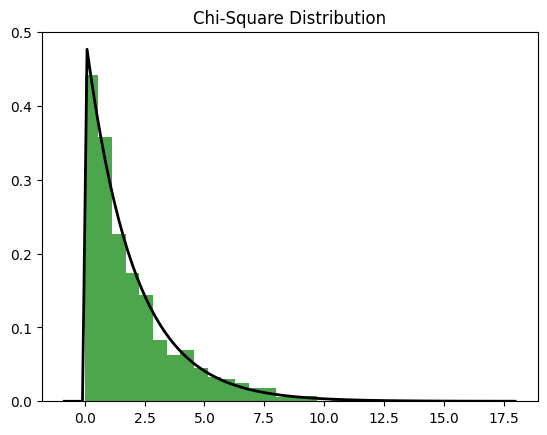

In [27]:
# 15
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(0)
df = 2
data = np.random.chisquare(df, 1000)

plt.hist(data, bins=30, density=True, alpha=0.7, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.chi2.pdf(x, df)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Chi-Square Distribution')
plt.show()


In [28]:
# 16
import numpy as np
from scipy.stats import f

data1 = np.random.normal(loc=0, scale=1, size=50)
data2 = np.random.normal(loc=0, scale=2, size=50)

f_stat = np.var(data1, ddof=1) / np.var(data2, ddof=1)
df1 = len(data1) - 1
df2 = len(data2) - 1
p_value = 1 - f.cdf(f_stat, df1, df2)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


F-Statistic: 0.23117036572753064
P-Value: 0.9999995137693954


In [30]:
# 17
import numpy as np
from scipy.stats import f_oneway

group1 = np.random.normal(5, 2, 50)
group2 = np.random.normal(5.5, 2, 50)
group3 = np.random.normal(6, 2, 50)

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


F-Statistic: 10.6803681918944
P-Value: 4.6679272901081193e-05


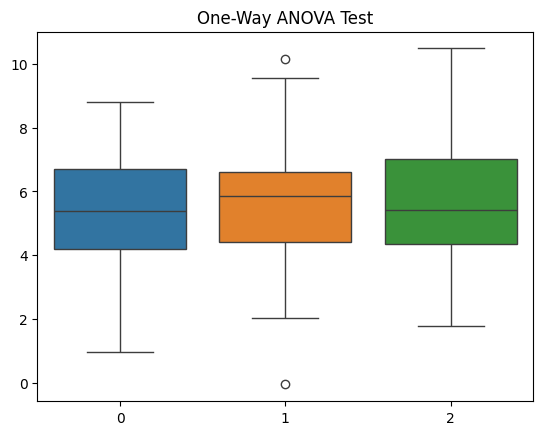

F-Statistic: 0.604827921914039
P-Value: 0.5475218329520759


In [32]:
# 18
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

group1 = np.random.normal(5, 2, 50)
group2 = np.random.normal(5.5, 2, 50)
group3 = np.random.normal(6, 2, 50)

f_stat, p_value = f_oneway(group1, group2, group3)

data = [group1, group2, group3]
sns.boxplot(data=data)
plt.title('One-Way ANOVA Test')
plt.show()

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


In [34]:
# 19.
import numpy as np
from scipy.stats import shapiro, levene

def check_anova_assumptions(groups):
    normality = [shapiro(group)[1] > 0.05 for group in groups]
    equal_variance = levene(*groups)[1] > 0.05
    independence = True
    return normality, equal_variance, independence

group1 = np.random.normal(5, 2, 50)
group2 = np.random.normal(5.5, 2, 50)
group3 = np.random.normal(6, 2, 50)

normality, equal_variance, independence = check_anova_assumptions([group1, group2, group3])
print(f"Normality: {normality}")
print(f"Equal Variance: {equal_variance}")
print(f"Independence: {independence}")


Normality: [True, True, False]
Equal Variance: True
Independence: True


                    sum_sq    df         F    PR(>F)
Factor1           0.021981   1.0  0.021951  0.882528
Factor2           2.897327   1.0  2.893393  0.092181
Factor1:Factor2   0.231001   1.0  0.230688  0.632107
Residual         96.130510  96.0       NaN       NaN


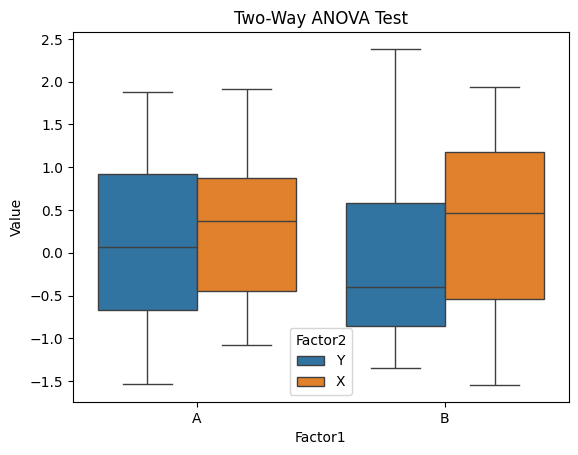

In [36]:
# 20
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
data = pd.DataFrame({
    'Factor1': np.random.choice(['A', 'B'], size=100),
    'Factor2': np.random.choice(['X', 'Y'], size=100),
    'Value': np.random.normal(size=100)
})

model = ols('Value ~ Factor1 * Factor2', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

sns.boxplot(x='Factor1', y='Value', hue='Factor2', data=data)
plt.title('Two-Way ANOVA Test')
plt.show()


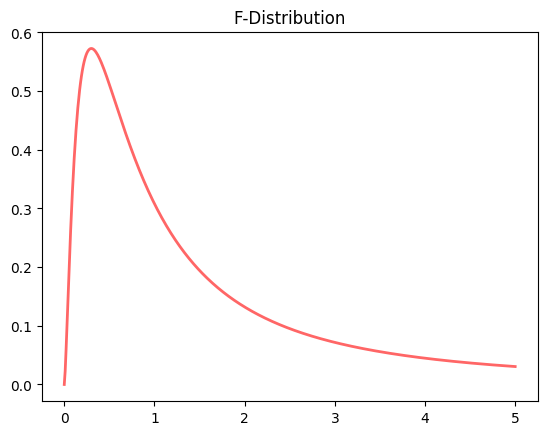

In [37]:
# 21.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

x = np.linspace(0, 5, 500)
dfn, dfd = 5, 2
plt.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')
plt.title('F-Distribution')
plt.show()


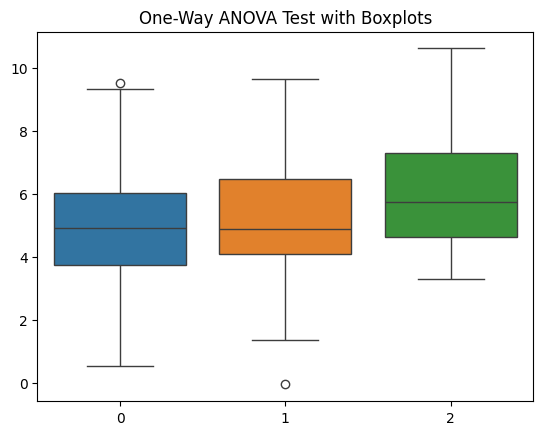

F-Statistic: 5.540665690908264
P-Value: 0.004787415379037707


In [38]:
# 22
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

group1 = np.random.normal(5, 2, 50)
group2 = np.random.normal(5.5, 2, 50)
group3 = np.random.normal(6, 2, 50)

f_stat, p_value = f_oneway(group1, group2, group3)
data = [group1, group2, group3]

sns.boxplot(data=data)
plt.title('One-Way ANOVA Test with Boxplots')
plt.show()

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


In [39]:
# 23
import numpy as np
from scipy.stats import ttest_1samp

data = np.random.normal(loc=50, scale=10, size=100)
t_stat, p_value = ttest_1samp(data, 50)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


T-Statistic: -1.4080156527078533
P-Value: 0.16225890920056843


In [40]:
# 24
import numpy as np
from scipy.stats import chi2

data = np.random.normal(loc=50, scale=10, size=100)
sample_variance = np.var(data, ddof=1)
population_variance = 100
n = len(data)
chi2_stat = (n - 1) * sample_variance / population_variance
p_value = 1 - chi2.cdf(chi2_stat, n - 1)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")


Chi-Square Statistic: 112.0538212602742
P-Value: 0.1744573340653085


In [43]:
# 25
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([50, 30])
nobs = np.array([100, 100])

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")



Z-Statistic: 2.886751345948129
P-Value: 0.003892417122778628


F-Statistic: 0.18232085070912693
P-Value: 0.9999999904099285


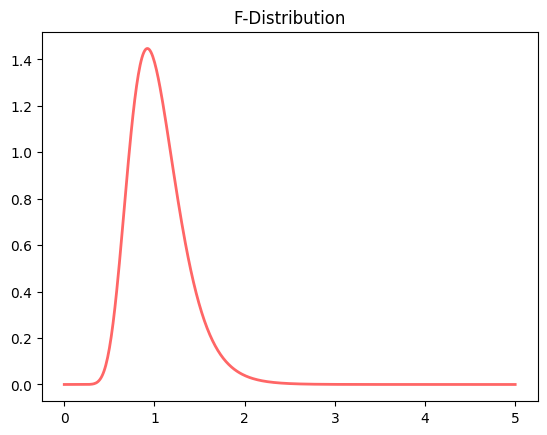

In [44]:
# 26
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

data1 = np.random.normal(loc=0, scale=1, size=50)
data2 = np.random.normal(loc=0, scale=2, size=50)

f_stat = np.var(data1, ddof=1) / np.var(data2, ddof=1)
df1 = len(data1) - 1
df2 = len(data2) - 1
p_value = 1 - f.cdf(f_stat, df1, df2)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

x = np.linspace(0, 5, 500)
plt.plot(x, f.pdf(x, df1, df2), 'r-', lw=2, alpha=0.6, label='f pdf')
plt.title('F-Distribution')
plt.show()


In [48]:
# 27.
import numpy as np
from scipy.stats import chisquare

observed = np.array([10, 20, 30])
total = observed.sum()
expected = total / len(observed)

expected_frequencies = np.full(observed.shape, expected)
chi2_stat, p_value = chisquare(observed, expected)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")






Chi-Square Statistic: 10.0
P-Value: 0.006737946999085468
